# <span style="color:Purple"> Numerical Simulation Laboratory : Exercise 5 </span>

In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

# Esercizio 5.1 - <span style="color:deeppink"> Metropolis Algorithm </span>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm , cauchy
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

In [2]:
r_1 , errors1 = np.loadtxt("ps1.csv" , dtype = float , delimiter = "," , usecols=(0 , 1) , unpack='true')
r_2 , errors2 =np.loadtxt("ps2.csv" , dtype = float , delimiter = "," , usecols=(0 , 1) , unpack='true')

r1_uni , r1_g = np.split( r_1 , 2 )
r2_uni , r2_g = np.split ( r_2 , 2 )
err_1_u , err_1_g = np.split (errors1 , 2)
err_2_u , err_2_g = np.split (errors2 , 2)

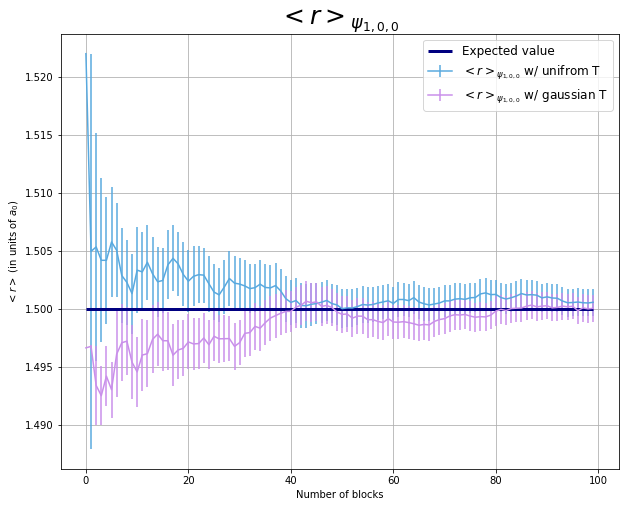

In [6]:
fig , ax = plt.subplots(1,1 , figsize=(10,8))
ax.errorbar( np.arange( 100 ) , r1_uni , yerr= err_1_u , color = "#58A9DF" , label = r"$<r>_{ \psi _{1,0,0} }$ w/ unifrom T")
ax.errorbar( np.arange( 100 ) , r1_g , yerr= err_1_g , color = "#C98FEA" , label = r"$<r>_{ \psi _{1,0,0} }$ w/ gaussian T")
ax.hlines(1.5 , 0 , 99 , color = "Navy" , linewidth = 3 , label ="Expected value")

ax.set_title( r"$<r>_{ \psi _{1,0,0} }$" , fontsize=25)
ax.set_xlabel('Number of blocks')
ax.set_ylabel(r'$<r> $ (in units of $a_0$)')


ax.grid(True)
ax.legend(loc="best" , prop={'size': 12} )

Il grafico riporta le stime del valor medio di r, $<r>$, per la densità di probabilità $\psi_{1,0,0}$, che è il ground state dell'atomo di idrogeno. Per campionare questa densità di probabilità è stato usato l'algoritmo di Metropolis. Nel caso del grafico azzurro la probabilità di transizione $T(x'|x_n)$ è uniforme, centrata nel punto $x_n$,  e di larghezza 1.2. Nel grafico viola invece $T(x'|x_n)$ è una distribuzione gaussiana centrata sempre in $x_n$, con varianza 0.75. La varianza e la larghezza sono state scelte seguendo la regola empirica del $50\%$.
I punti campionati in ciascuna simulazione sono $10^7$, si è poi usata la tecnica del data blocking in modo da poter ottenere una stima delle incertezze.

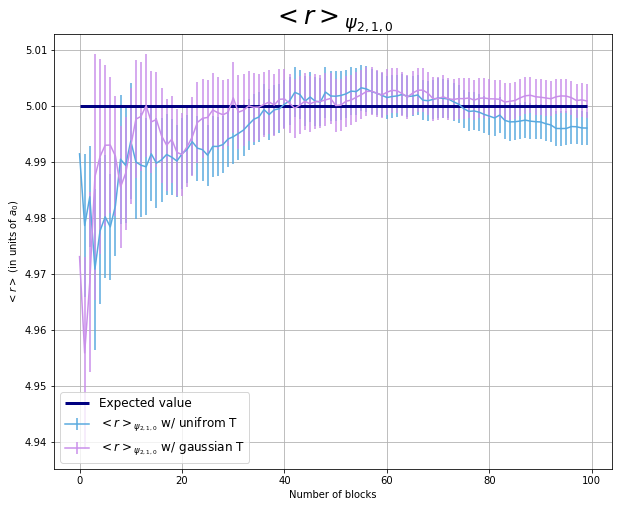

In [9]:
fig , ax = plt.subplots(1,1 , figsize=(10,8))
ax.errorbar( np.arange( 100 ) , r2_uni , yerr= err_2_u , color = "#58A9DF" , label = r"$<r>_{ \psi _{2,1,0} }$ w/ unifrom T")
ax.errorbar( np.arange( 100 ) , r2_g, yerr= err_2_g , color = "#C98FEA" , label = r"$<r>_{ \psi _{2,1,0} }$ w/ gaussian T")
ax.hlines(5 , 0 , 99 , color = "Navy" , linewidth = 3 , label ="Expected value")

ax.set_title(r"$<r>_{ \psi _{2,1,0} }$" , fontsize=25)
ax.set_xlabel('Number of blocks')
ax.set_ylabel(r'$<r> $ (in units of $a_0$)')


ax.grid(True)
ax.legend(loc="best" , prop={'size': 12})

Il grafico riporta le stime del valor medio di r, $<r>$, per la densità di probabilità $\psi_{2,1,0}$, che è il primo stato eccitato dell'atomo di idrogeno. Per campionare questa densità di probabilità è stato usato l'algoritmo di Metropolis. Nel caso del grafico azzurro la probabilità di transizione $T(x'|x_n)$ è uniforme, centrata nel punto $x_n$,  e di larghezza 3. Nel grafico viola invece $T(x'|x_n)$ è una distribuzione gaussiana centrata sempre in $x_n$ , con varianza 1.9. La varianza e la larghezza sono state scelte seguendo la regola empirica del $50\%$.
I punti campionati in ciascuna simulazione sono $10^7$, si è poi usata la tecnica del data blocking in modo da poter ottenere una stima delle incertezze e per ridurre la correlazione tra i dati.

## Simulazione partendo da un punto non ottimale: (15 , 0 , 0)

In [10]:
r_1f , errors1f = np.loadtxt("ps1_far.csv" , dtype = float , delimiter = "," , usecols=(0 , 1) , unpack='true')
r_2f , errors2f =np.loadtxt("ps2_far.csv" , dtype = float , delimiter = "," , usecols=(0 , 1) , unpack='true')

r1_unif , r1_gf = np.split (r_1f , 2)
r2_unif , r2_gf = np.split ( r_2f , 2)
err_1_uf , err_1_gf = np.split (errors1f , 2)
err_2_uf , err_2_gf = np.split (errors2f , 2)

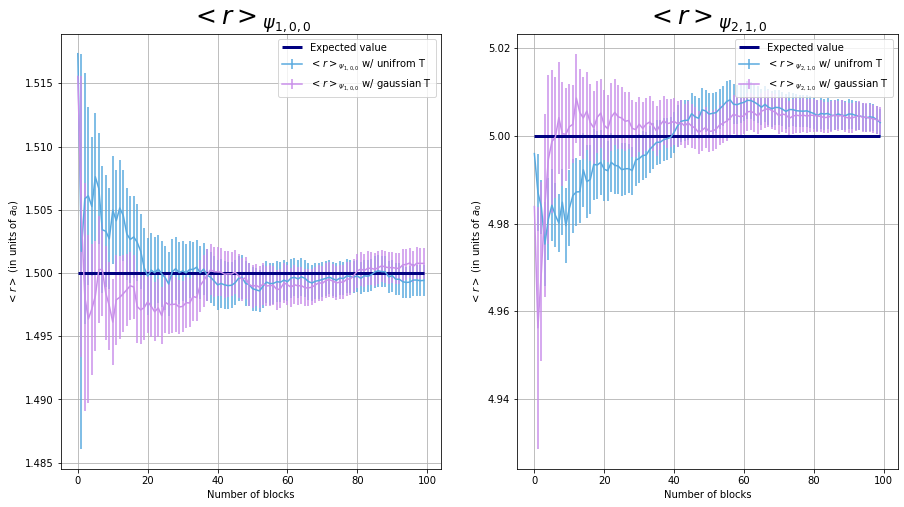

In [12]:
fig , ax = plt.subplots(1,2 , figsize=(15,8))

ax[0].errorbar( np.arange( 100 ) , r1_unif , yerr= err_1_uf , color = "#58A9DF" , label = r"$<r>_{ \psi _{1,0,0} }$ w/ unifrom T")
ax[0].errorbar( np.arange( 100 ) , r1_gf , yerr= err_1_gf , color = "#C98FEA" , label = r"$<r>_{ \psi _{1,0,0} }$ w/ gaussian T")
ax[0].hlines(1.5 , 0 , 99 , color = "Navy" , linewidth = 3 , label ="Expected value")

ax[0].set_title(r"$<r>_{ \psi _{1,0,0} }$" , fontsize=25)
ax[0].set_xlabel('Number of blocks')
ax[0].set_ylabel(r'$<r> $ (in units of $a_0$)')


ax[0].grid(True)
ax[0].legend(loc="best" , prop={'size': 12})

ax[1].errorbar( np.arange( 100 ) , r2_unif , yerr= err_2_uf , color = "#58A9DF" , label = r"$<r>_{ \psi _{2,1,0} }$ w/ unifrom T")
ax[1].errorbar( np.arange( 100 ) , r2_gf, yerr= err_2_gf , color = "#C98FEA" , label = r"$<r>_{ \psi _{2,1,0} }$ w/ gaussian T")
ax[1].hlines(5 , 0 , 99 , color = "Navy" , linewidth = 3 , label ="Expected value")

ax[1].set_title(r"$<r>_{ \psi _{2,1,0} }$" , fontsize=25)
ax[1].set_xlabel('Number of blocks')
ax[1].set_ylabel(r'$<r> $ (in units of $a_0$)')


ax[1].grid(True)
ax[1].legend(loc="best" , prop={'size': 12})

#posizione iniziale distante 10 raggi di bohr dall'origine

I grafici riportano il valor medio $\langle r \rangle$ calcolato in una simulazione in cui il punto di partenza non è ottimale. Ciò non sembra particolarmente influire nel caso del ground state, invece la stima finale di $\langle r \rangle$ nel caso del primo stato eccitato non risulta più compatibile con il valore atteso. L'algoritmo fa quindi più fatica a campionare questa funzione d'onda, bisognerà incrementare il numero di campionamenti per ritrovare un risultato compatibile.  Nel grafico successivo ho riportato i due grafici del valor medio della distannza dall'origine per il primo stato eccitato, in modo da rendere più chiara la migliore compatibilità con il valore atteso nel caso in cui il punto di partenza è più adatto alla distribuzione di probabilità da campionare.

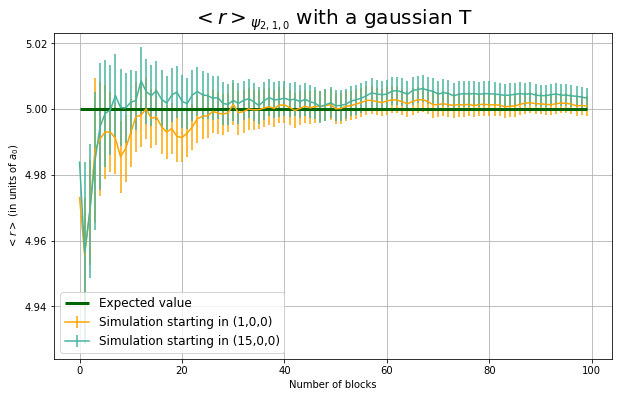

In [18]:
fig , ax = plt.subplots(1,1 , figsize=(10,6))
ax.errorbar( np.arange( 100 ) , r2_g , yerr= err_2_g , color = "orange" , label = r"Simulation starting in (1,0,0)" )
ax.errorbar( np.arange( 100 ) , r2_gf , yerr= err_2_gf , color = "#45B39D" , label = r"Simulation starting in (15,0,0)")
ax.hlines(5 , 0 , 99 , color = "darkgreen" , linewidth = 3 , label ="Expected value")

ax.set_title( r"$<r>_{ \psi _{2,1,0} }$ with a gaussian T" , fontsize=20)
ax.set_xlabel('Number of blocks')
ax.set_ylabel(r'$<r> $ (in units of $a_0$)')


ax.grid(True)
ax.legend(loc="best" , prop={'size': 12} )